# Deep Learning with Python

## Setup

This guide was written in Python 3.5.

### Python and Pip

Download [Python](https://www.python.org/downloads/) and [Pip](https://pip.pypa.io/en/stable/installing/).

### Libraries

Let's install the modules we'll need for this tutorial. Open up your terminal and enter the following commands to install the needed python modules: 

```
pip3 install sklearn
pip3 install lasagne
pip3 install theano
pip3 install keras
pip3 install tensorflow
pip3 install imutils
```

## Background

### What is Deep Learning? 

Deep Learning is a branch of machine learning that involves pattern recognition on unlabeled or unstructured data. It uses a model of computing inspired by the structure of the brain, which we call this model a neural network.

### Neural Networks

#### What is a Neural Network? 

Neural networks get their representations from using layers of learning. The general structure of a neural network looks like:

[This](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2.-ann-structure.jpg)

Meanwhile, a typical singular neuron looks like:

[This](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/1.jpg)

- The x<sub>1</sub>, x<sub>2</sub>, ... , x<sub>N</sub> variables are the inputs. These can either be the actual observations from the input layer or an intermediate value from one of the hidden layers.
- x<sub>0</sub> is the bias unit. This is a constant value added to the input of the activation function.
- w<sub>0</sub>,w<sub>1</sub>, w<sub>2</sub>, ... ,w<sub>N</sub> are the weights on each input - note that even the bias unit has a weight.
- a is the output of the neuron, which we calculate from:

$a = f(\Sigma_{i=0}^N w_i x_i)$

formula, where f is the activation function (you can find more on this in section 1.2.5)

##### Input Layer

The first layer is a type of visible layer called an input layer. This layer contains an input node for each of the entries in our feature vector. From there, these nodes connect to a series of hidden layers.

##### Hidden Layers 

These are the intermediate layers between input and output which help the Neural Network learn the complicated relationships involved in data. The final hidden layer then connects to an output layer.

##### Output Layer

The final output is extracted from the previous two layers. This layer contains the output probabilities for each class label. For example, in the case of a classification problem with 5 classes, the output later will have 5 neurons, each with its respective probability. The output node that produces the largest probability is chosen as the overall classification.

##### Activation Function

The activation function allows the neural network to be flexible and have the capability to estimate complex non-linear relationships in data. It can be a gaussian function, logistic function, hyperbolic function or even a linear function in simple cases.

### Types of Neural Networks

#### Feedforward Neural Networks

Feedforward Neural Networks are the simplest form of Artificial Neural Networks. These networks have the three types of layers we just discussed: Input layer, hidden layer and output layer. 

#### Convolutional Neural Networks

Convolutional neural networks are a type of feed-forward network. What distinguishes ConVets are that the architectures make the explicit assumption that the inputs are images, allowing us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network. 

#### Recurrent Neural Networks

A Recurrent Neural Network is a class of ANNs where connections between units form a directed cycle, as shown 

[Here](https://camo.githubusercontent.com/a60c701dea057ea0ac5634b09713b3d3e4867ec8/687474703a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f642f64642f526563757272656e744c617965724e657572616c4e6574776f726b2e706e67)

### BackPropagation

Back-propagation algorithms work by determining the loss (or error) at the output and then propagating it back into the network. The weights are updated to minimize the error resulting from each neuron, since the goal of learning is to assign correct weights for these edges.

In other words, backprop is one of the several ways in which an artificial neural network can be trained. It is a supervised training scheme, which means, it learns from labeled training data. To put in simple terms, BackProp learns from its mistakes by having the supervisor correct the ANN whenever it makes mistakes. 

Note: To forward propagate is to get the output and compare it with the real value to get the error. To back propagate is to minimize the error by propagating backwards by finding the derivative of error with respect to each weight and the subtracting this value from the weight value.


#### BackProp Algorithm

Initially all the edge weights are randomly assigned. For every input in the training dataset, the ANN is activated and its output is observed. This output is compared with the desired output that we already know, and the error is "propagated" back to the previous layer. This error is noted and the weights are "adjusted" accordingly. This process is repeated until the output error is below a predetermined threshold. 

Once the above algorithm terminates, we have a "learned" ANN which we consider ready to work with "new" inputs. This ANN is said to have learned from several examples (labeled data) and from its mistakes (error propagation).


### Gradient Descent

Gradient descent is a standard tool for interactively optimizing complex functions. Given some arbitrary function, gradient descent's goal is to find a <b> minimum</b>. For some small subset of functions - those that are convex - there's just a single minimum which also happens to be global. But for most realistic functions, there may be many minima, so most minima are local. 

The main premise of gradient descent is: given some current location x in the search space (the domain of the optimized function) we update x for the next step in the direction opposite to the gradient of the function computed at x. 


### Hardware


#### GPU & CPU 

The GPU's advanced capabilities were originally used primarily for 3D game rendering, but are now being used more broadly to accelerate computational workloads in deep learning. 

Architecturally, the CPU is composed of just a few cores with lots of cache memory that can handle a few software threads at a time. In contrast, a GPU is composed of hundreds of cores that can handle thousands of threads simultaneously. 

A simple way to understand the difference between a GPU and a CPU is to compare how they process tasks. A CPU consists of a few cores optimized for sequential serial processing while a GPU has a massively parallel architecture consisting of thousands of smaller, more efficient cores designed for handling multiple tasks simultaneously.


## Building a Neural Net

### Generating a Dataset

First, we import all the needed modules. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

The following just displays plots inline and changes default figure size

In [2]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Let's start by generating a dataset to use. Fortunately, scikit-learn has some useful dataset generators, so we don't need to write the code ourselves and will go with the `make_moons` function instead.

In [3]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)

Using built-in scatter plot functions, we'll do a quick visualization of our data. 

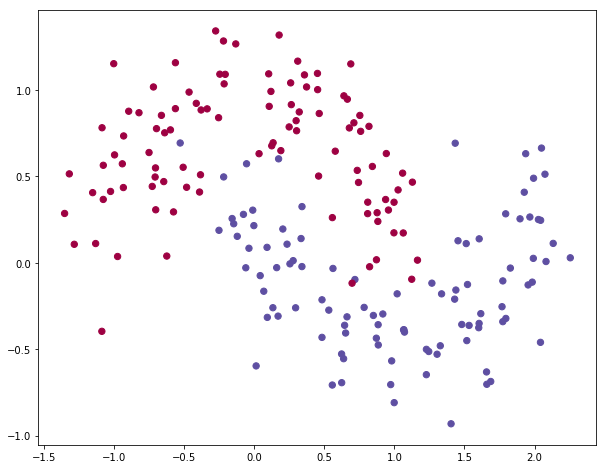

In [4]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

As you can see, the dataset we generated has two classes, plotted as red and blue points. Our goal is to train a Machine Learning classifier that predicts the correct class given the x and y coordinates. 

Because the data is not linearly separable, we can't draw a straight line that separates the two classes, which means that linear classifiers, such as Logistic Regression, won't be able to fit the data. But that's one of the major advantages of Neural Networks - we won't need to worry about feature engineering because the hidden layer of a neural network will learn features for us.

### Logistic Regression

To demonstrate this, let's train a Logistic Regression classifier. Its input will be the x and y values and the output the predicted class (0 or 1). Since scikit-learn has a logistic regression class built in, we'll go ahead and use that. 


In [5]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Now we create a helper function to plot a decision boundary. If you don't fully understand this function don't worry, it just generates the contour plot below.


In [7]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Now, let's plot the decision boundary

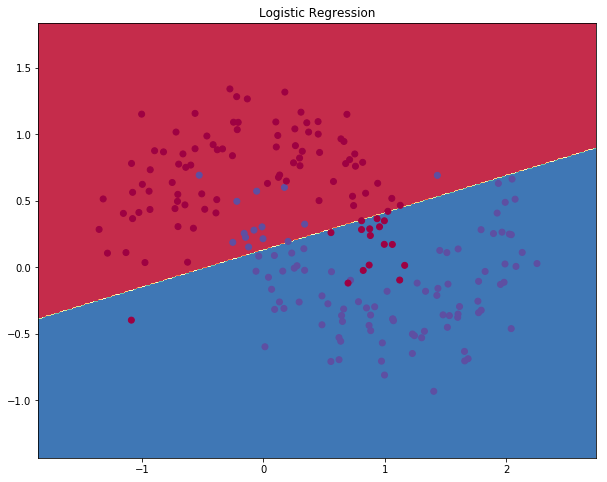

In [8]:
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

As you can see, this logistic regression function isn't quite so good! It fails to capture the true form of the data. 

### Gradient Descent & Loss Function

In section 1, we briefly covered gradient descent and loss functions. Here, we'll actually implement these functions and use them to train our neural net. So let's start by defining some useful variables and parameters for gradient descent:


In [9]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

We need to define the parameters for gradient descent, specifically the learning rate and the regularization strength. 

#### Learning Rate

The learning rate determines how fast or slow we will move towards the optimal weights. If the learning rate is too large the optimal solution will be skipped. But if it's too small we'll need too many iterations to converge to the best values. So using a good learning rate is crucial. Typically, a good technique is to adapt the value of learning rate in each iteration, but for this example, we'll just hand-pick one. 

#### Regularization Strength

The regularization parameter, &lambda; reduces overfitting, which reduces the variance of your estimated regression parameters. However, it does this at the expense of adding bias to your estimate - a common tradeoff you'll encounter in the field of machine learning.

One approach you can take is to randomly subsample your data a number of times and look at the variation in your estimate. Then repeat the process for a slightly larger value of lambda to see how it affects the variability of your estimate. Keep in mind that whatever value of lambda you decide is appropriate for your subsampled data, you can likely use a smaller value to achieve comparable regularization on the full data set.

With that said, in this exercise, I've just hand-picked a value. 


#### Code 

Here are our hand-chosen rates: 

In [11]:
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

Next, we create a helper function to evaluate the total loss on the dataset. 


In [12]:
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss 
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return (1./num_examples * data_loss)

We also implement a helper function to calculate the output of the network. It does forward propagation as defined above and returns the class with the highest probability.


In [13]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return (np.argmax(probs, axis=1))

### Training a Neural Network

Finally, we train our Neural Network. Here, we implement batch gradient descent using the backpropagation derivates we found above.

In [14]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    model = {}
    for i in range(0, num_passes):
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    return (model)

In [15]:
model = build_model(3, print_loss=True)


Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068887
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


Here, we're just plotting the decision boundary


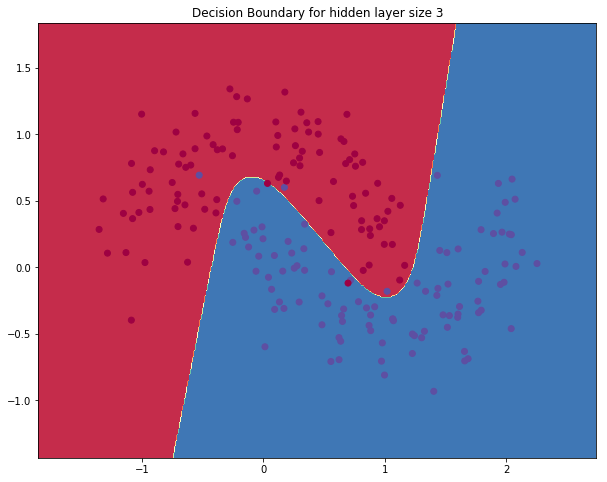

In [16]:
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

Let's see what happens if we train a network with a hidden layer size of 3.

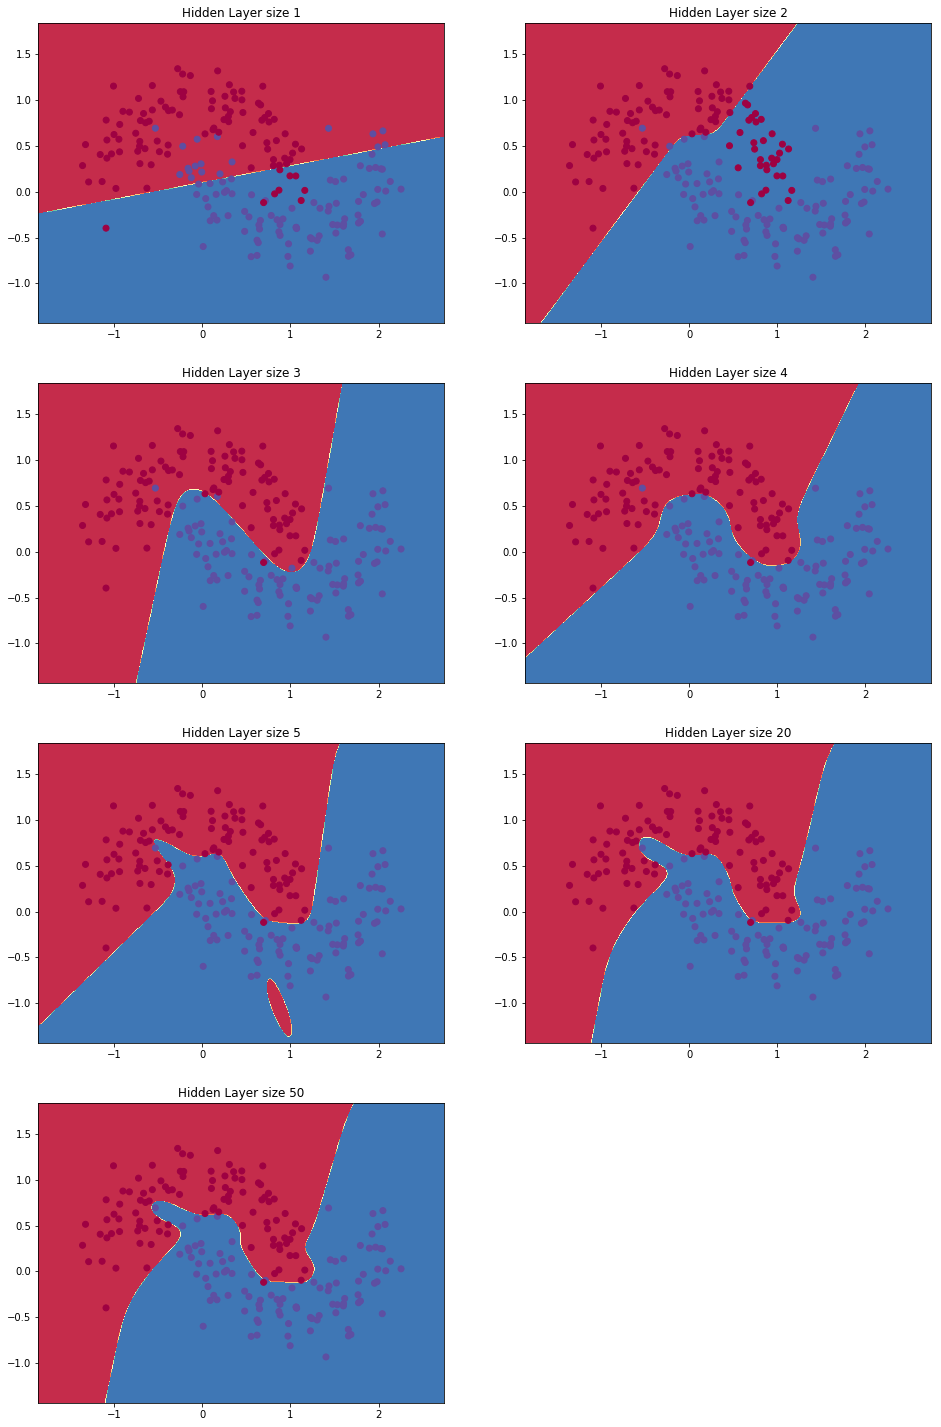

In [18]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

We can see that while a hidden layer of low dimensionality nicely captures the general trend of our data, but higher dimensionalities are prone to overfitting. They are "memorizing" the data as opposed to fitting the general shape. If we were to evaluate our model on a separate test set (and you should!) the model with a smaller hidden layer size would likely perform better because it generalizes better. We could counteract overfitting with stronger regularization, but picking the correct size for a hidden layer is a much more efficient solution.


## Python Modules

### Theano

Theano is a Python library that is used to define, optimize, and evaluate mathematical expressions with multi-dimensional arrays. Theano accomplishes this through its own data structures integrated with NumPy and the transparent use of the GPU. More specifically, Theano figures out which computational portions should be moved to the GPU.

Theano isn't actually a machine learning library since it doesn't provide you with pre-built models to train on your data. Instead, it's a mathematical library that provides you with tools to build your own machine learning models. 


#### Why Theano? 

Simply put, Theano's strong suit is efficiency. Its primary purpose is to increase the speed of computation. 

How does it accomplish this? Identifying 'small' changes like `(x+y) + (x+y)` to `2*(x+y)`, over time, make a substantial difference. Moreover, because it defines different mathematical expressions in C, it makes for much faster implementations. And because of this, Theano works well in high dimensionality problems. Lastly, it allows GPU implementation. 

#### Symbolic Variables

In Theano, all algorithms are defined symbolically, meaning that they don't have an explicit value.

#### Symbolic Functions 

To actually perform computations with Theano, you use symbolic functions, which can later be called with actual values. Symbolic functions allow us to automatically derive gradient expressions.

First, we import the needed libraries: 

In [19]:
import theano
import numpy

Next, we create the building blocks of our function. Here, x is a vector, W is an array we set up with numpy, and y is the function we'll use to compute the result. 


In [20]:
x = theano.tensor.fvector('x')
W = theano.shared(numpy.asarray([0.2, 0.7]), 'W')
y = (x * W).sum()

Finally, we actually perform the computation with Theano.


In [24]:
f = theano.function([x], y)
output = f([1.0, 1.0])
print(output)

0.8999999999999999


Since we printed output, we get about `(0.2*1.0) + (0.7*1.0)` = `0.9`. 
